# Fourier Transforms

In this notebook, I'll transform the target images to see how they look in the frequency domain.

Text(0.5,1,'test5')

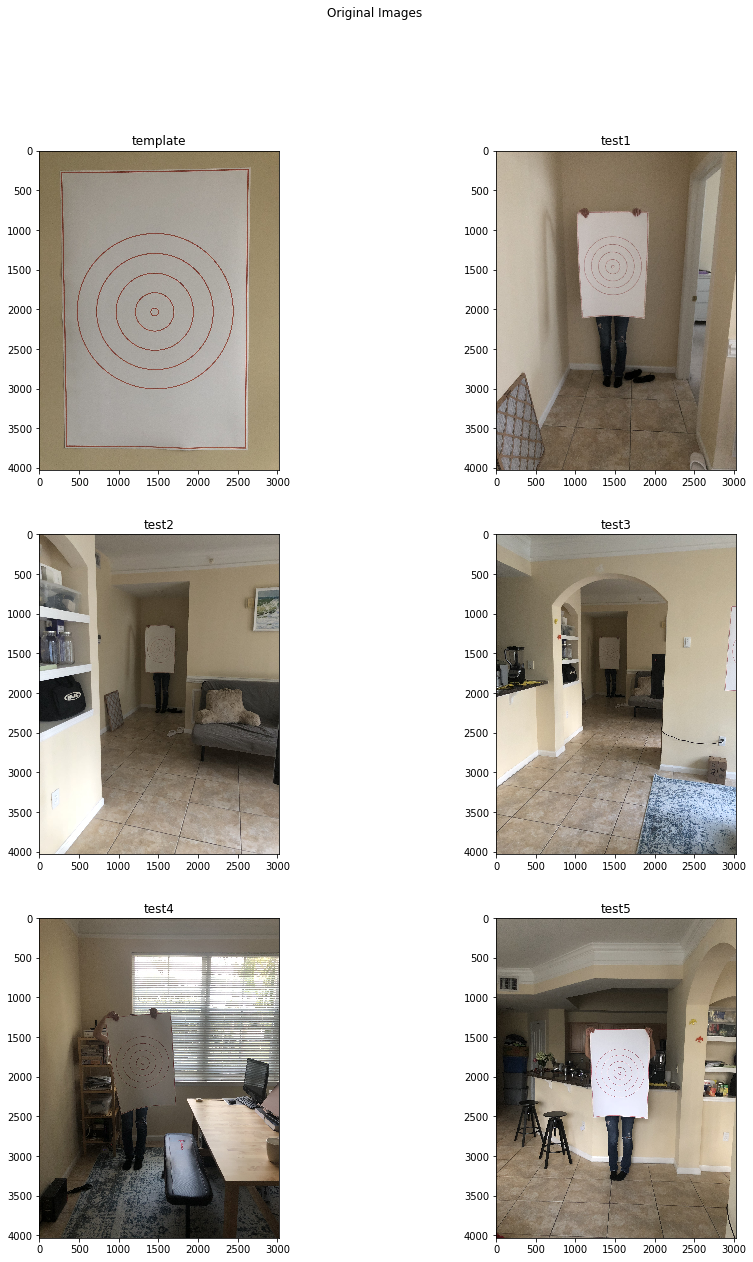

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# read in the images
template = cv2.imread('images/template.jpeg')
test1 = cv2.imread('images/test1.jpeg')
test2 = cv2.imread('images/test2.jpeg')
test3 = cv2.imread('images/test3.jpeg')
test4 = cv2.imread('images/test4.jpeg')
test5 = cv2.imread('images/test5.jpeg')
# change color to RGB (from BGR)
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
test1 = cv2.cvtColor(test1, cv2.COLOR_BGR2RGB)
test2 = cv2.cvtColor(test2, cv2.COLOR_BGR2RGB)
test3 = cv2.cvtColor(test3, cv2.COLOR_BGR2RGB)
test4 = cv2.cvtColor(test4, cv2.COLOR_BGR2RGB)
test5 = cv2.cvtColor(test5, cv2.COLOR_BGR2RGB)

# display images
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(ncols=2,
                                                            nrows=3,
                                                            figsize=(15,20))
figure.suptitle('Original Images')
ax1.imshow(template)
ax2.imshow(test1)
ax3.imshow(test2)
ax4.imshow(test3)
ax5.imshow(test4)
ax6.imshow(test5)
ax1.set_title('template')
ax2.set_title('test1')
ax3.set_title('test2')
ax4.set_title('test3')
ax5.set_title('test4')
ax6.set_title('test5')

**template** the template image has been taken against a clean background at a close distance. It's puprose is to capture of details of what we want to detect.

**test 1-5** the test images have been taken at various combinations of distance, light, and background cluter to simulate real world (worst case) environment of what we want to detect. Also, the paper has been grabbed from the top to simulate clamping at a gun range.

In [22]:
# convert to grayscale to focus on the intensity patterns
template_gray = cv2.cvtColor(template, cv2.COLOR_RGB2GRAY)
test1_gray = cv2.cvtColor(test1, cv2.COLOR_RGB2GRAY)
test2_gray = cv2.cvtColor(test2, cv2.COLOR_RGB2GRAY)
test3_gray = cv2.cvtColor(test3, cv2.COLOR_RGB2GRAY)
test4_gray = cv2.cvtColor(test4, cv2.COLOR_RGB2GRAY)
test5_gray = cv2.cvtColor(test5, cv2.COLOR_RGB2GRAY)

# normalize the image color values
template_norm = template_gray/255.0
test1_norm = test1_gray/255.0
test2_norm = test2_gray/255.0
test3_norm = test3_gray/255.0
test4_norm = test4_gray/255.0
test5_norm = test5_gray/255.0

In [23]:
# perform a fast fourier transform and create a scaled, frequency transform image
def ft_image(image_norm):
    '''This function takes in a normalized, grayscale image
        and returns a frequency spectrum of the image.'''
    f = np.fft.fft2(image_norm)
    fshift = np.fft.fftshift(f)
    frequency_tx = 20*np.log(np.abs(fshift))
    
    return frequency_tx

Text(0.5,1,'test5')

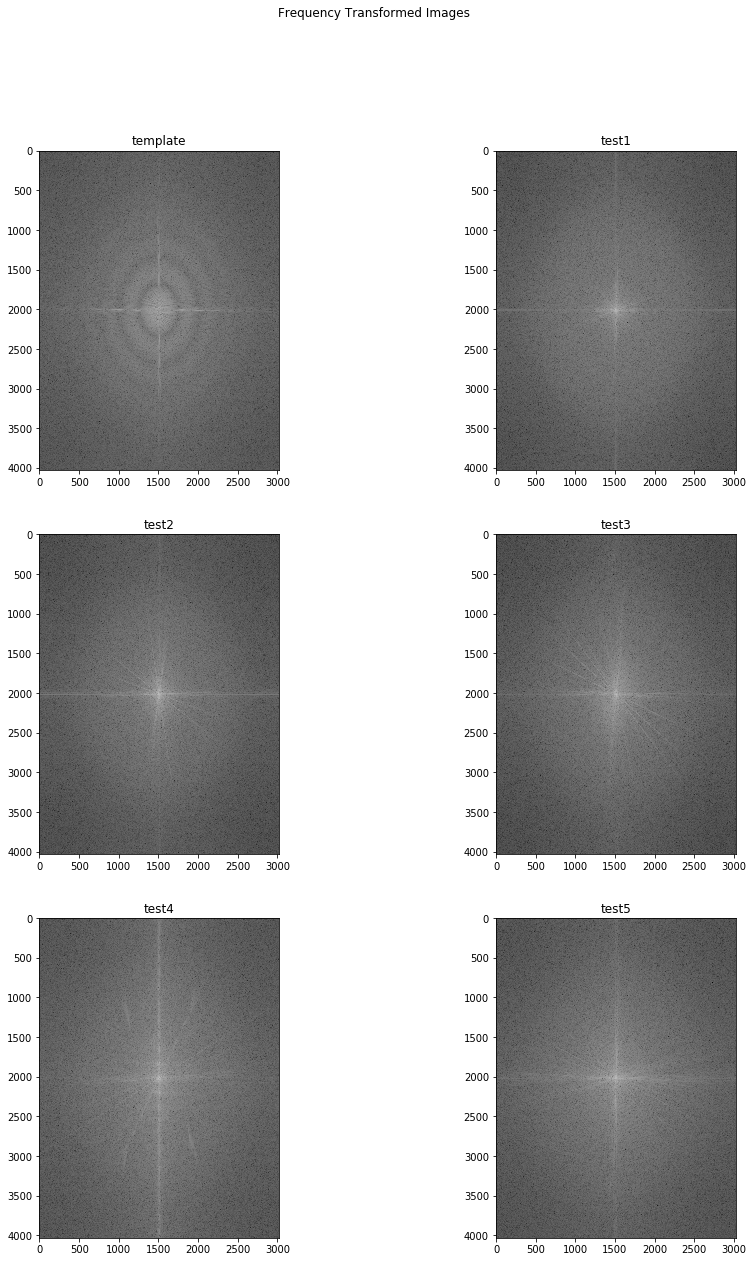

In [24]:
# call ft_image function on the normalized images
template_f = ft_image(template_norm)
test1_f = ft_image(test1_norm)
test2_f = ft_image(test2_norm)
test3_f = ft_image(test3_norm)
test4_f = ft_image(test4_norm)
test5_f = ft_image(test5_norm)

# display the transformed images
# display images
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(ncols=2,
                                                            nrows=3,
                                                            figsize=(15,20))
figure.suptitle('Frequency Transformed Images')
ax1.imshow(template_f, cmap='gray')
ax2.imshow(test1_f, cmap='gray')
ax3.imshow(test2_f, cmap='gray')
ax4.imshow(test3_f, cmap='gray')
ax5.imshow(test4_f, cmap='gray')
ax6.imshow(test5_f, cmap='gray')
ax1.set_title('template')
ax2.set_title('test1')
ax3.set_title('test2')
ax4.set_title('test3')
ax5.set_title('test4')
ax6.set_title('test5')

Low frequencies are at the centers of the frequency transform images.

**template image** <br>
The cicrular red patterns in the template image are visible in its frequency transform in the form of ripples. These ripples are in the lower frequency region. The horizontal/vertical edges of the paper (including the red lines) are also visible in the form horizontal/vertical midlines in the frequency transform.

**test1 - test5 images** <br>
The further away the target the less profound are the ripples in frequency transforms. Also, non horizontal/vertical edges appear in the frequency transforms. This means there're multiple dominating directions in the test images.

<p style="font-family: Arial; font-size:3em;color:purple; font-style:bold"><br>
My Solution</p><br>

No problem. You can refer to '**2C-L1 Fourier transform**' part of [Introduction to Computer Vision](https://www.udacity.com/course/introduction-to-computer-vision--ud810 ) to know more about fourier transform.